<a href="https://colab.research.google.com/github/disenodc/MachineLearning_UNS/blob/main/TP3_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP3-1_KNN

In [24]:
# Importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from numpy.random import randn

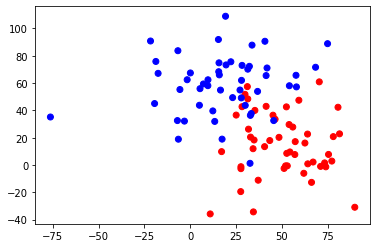

In [73]:
#Creo dataset bidimensional
mediaX1 = 50
mediaY1 = 20
muestras = 50
desvioX1 = 20
desvioY1 = 25
mediaX2 = 20
mediaY2 = 60
muestras = 50
desvioX2 = 25
desvioY2 = 20

X1 = pd.Series(np.random.normal(loc = mediaX1, scale = desvioX1, size = muestras));
Y1 = pd.Series(np.random.normal(loc = mediaY1, scale = desvioY1, size = muestras)) ;

Data1 = pd.DataFrame({'color':'r','target':'A','x':X1,'y' :Y1});

X2 = pd.Series(np.random.normal(loc = mediaX2, scale = desvioX2, size = muestras))
Y2 = pd.Series(np.random.normal(loc = mediaY2, scale = desvioY2, size = muestras)) 

Data2 = pd.DataFrame({'color': 'b', 'target': 'B', 'x':X2, 'y' :Y2})

Dataset = pd.concat([Data1, Data2,],ignore_index = True, axis = 0)

plt.scatter(Dataset['x'], Dataset['y'], c= Dataset['color'])


In [78]:
#Reviso Dataset
Dataset.head(10)

,color,target,x,y
0,r,A,17.076464,9.804128
1,r,A,52.939965,-0.613938
2,r,A,64.116524,0.863881
3,r,A,25.041214,36.556035
4,r,A,48.411795,20.264398
5,r,A,80.608347,42.286018
6,r,A,81.442464,22.827127
7,r,A,29.866870,51.729771
8,r,A,31.371470,48.399455
9,r,A,66.166955,-12.700296


In [77]:
# Cargo dataset 
#bi_df =  pd.read_csv("https://raw.githubusercontent.com/disenodc/MachineLearning_UNS/main/bidimension.csv")
#bi_df

In [80]:
x = Dataset[['x','y']].values
y = Dataset['target'].values

In [81]:
# Separo los conjuntos en entrenamiento y prueba
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
print(Dataset.groupby('target').size())


target
A    50
B    50
dtype: int64


In [87]:
# Entreno el modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)
knn.fit(X_test, y_test)


KNeighborsClassifier(n_neighbors=4)

In [88]:
#calculando precision del modelo
knn.score(X_train, y_train)

0.8375

In [89]:
#Calculo la precision del modelo
print(knn.score(X_test, y_test))

0.9


Hacer FOR variando K y 

EL valor maximo -> valor K optimo = mayor score

Entrenar otro modelo K optimo

Matriz de confusion

([<matplotlib.axis.XTick at 0x7f048edef8d0>,
 <a list of 3 Text major ticklabel objects>)

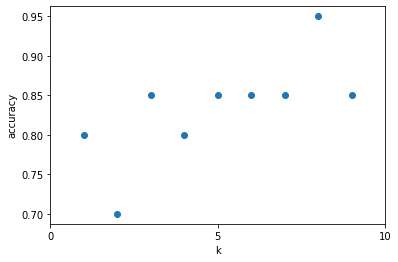

In [90]:
# Elegir el mejor valor de k y graficar score en funcion

k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10])

In [100]:
# Entreno el modelo con el K optimo
knn = neighbors.KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

#calculando precision del modelo
print(knn.score(X_train, y_train))

#Calculo la precision del modelo
print(knn.score(X_test, y_test))

0.9
0.9


In [108]:
#Prediccion - Confusion Matrix
prediccion = knn.predict(X_test)

Confusion_Matrix = confusion_matrix(y_test, prediccion)

print(confusion_matrix(y_test, prediccion))

print(classification_report(y_test, prediccion))

print(prediccion)

[[ 8  2]
 [ 0 10]]
              precision    recall  f1-score   support

           A       1.00      0.80      0.89        10
           B       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

['A' 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'B' 'A' 'A' 'A'
 'A' 'B']


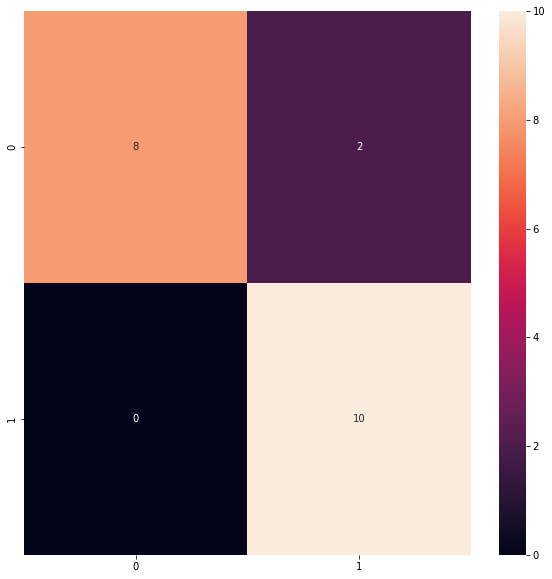

In [112]:
# Matriz de confusion

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(Confusion_Matrix, annot=True);


In [114]:
#reviso correlacion
bi_data_corr = Dataset.corr()

bi_data_corr

,x,y
x,1.000000,-0.372752
y,-0.372752,1.000000
